In [6]:
#パーセプトロンでIrisデータを学習する
#https://qiita.com/ao_log/items/fe9bd42fd249c2a7ee7a
from sklearn.datasets import load_iris
iris = load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.loc[df['target'] == 0, 'target'] = "setosa"
df.loc[df['target'] == 1, 'target'] = "versicolor"
df.loc[df['target'] == 2, 'target'] = "virginica"

In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.data.shape

(150, 4)

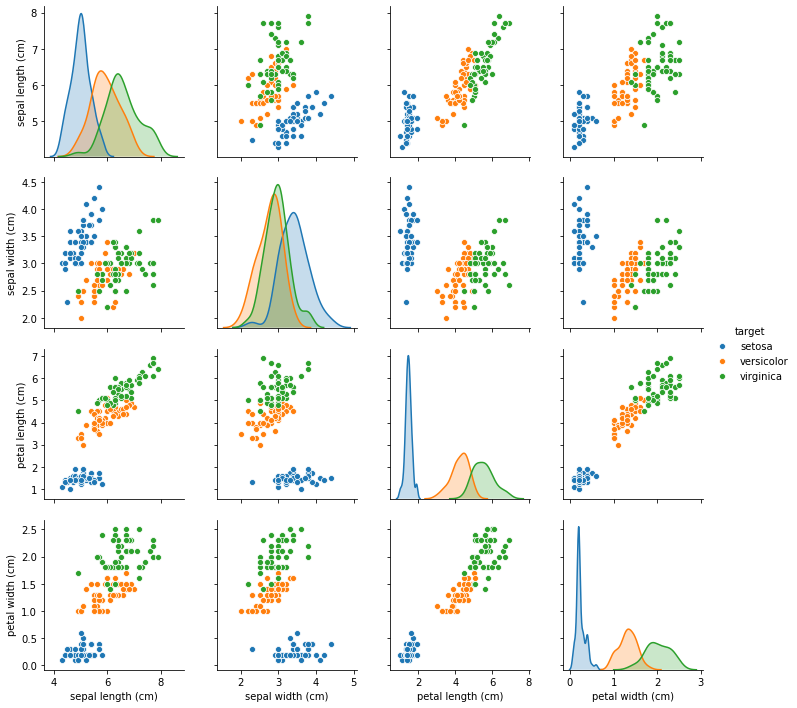

In [12]:
#pair plot
import seaborn as sns

#jupyterでmatplotlib使う時に必要
%matplotlib inline
sns.pairplot(df, hue="target")

In [13]:
#perceptron 達人データサイエンティストによる理論と実践　Python機械学習プログラミング　より

import numpy as np
class Perceptron(object):
    '''
    パーセプトロン分類器
    
    パラメータ
    -------------
    eta : float
        学習率(0.0より大きく1.0以下)
    n_iter : int
        トレーニングデータのトレーニング回数
    random_state : int
        重みを初期化するための乱数シード
    
    属性
    -------------
    w_ : 1次元配列
            適合後の重み
    errors_ : リスト
            各エポックでの誤分類(更新)の数
    '''
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1) :
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X,  y) :
        '''
        トレーニングデータに適合させる
        
        パラメータ
        --------------
        X : { 配列のようなデータ構造 }, shape = [n_samples, n_features]
            トレーニングデータ
            n_samples: サンプルの個数　　n_features: 特徴量の個数
        y : 配列のようなデータ構造, shape = [n_samples]
            目的変数
        
        戻り値
        --------------
        self : object
        '''
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter) :
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

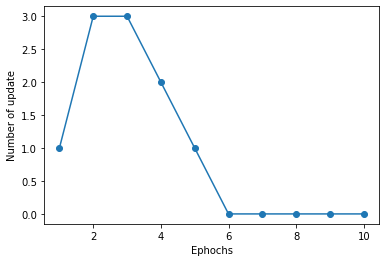

In [16]:
#データ抽出
y  = df.iloc[0:100, 4].values
y = np.where(y=='setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

#perceptronのオブジェクト生成
import matplotlib.pyplot as plt

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Ephochs')
plt.ylabel('Number of update')

plt.show()


In [26]:
#plot用サンプルコード　達人データサイエンティストによる理論と実践　Python機械学習プログラミング　より

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02) :
    #マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域のプロット用
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() +1
    
    #グリッドポイント生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                              np.arange(x2_min, x2_max, resolution))
    
    #各特徴量を１次元配列に変換し予測
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    #予測結果を元のグリッドポイントのデータサイズへ変換
    Z = Z.reshape(xx1.shape)
    #グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    #軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                           y=X[y==cl, 1],
                           alpha=0.8,
                           c=colors[idx],
                           marker=markers[idx],
                           label=cl,
                           edgecolor='black')



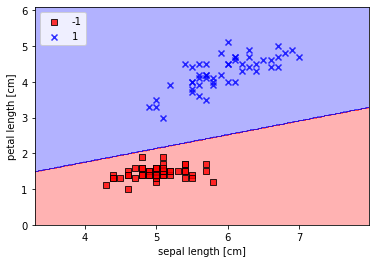

In [27]:
#決定領域のプロット
plot_decision_regions(X, y, classifier=ppn)

#軸のラベル
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [37]:
#ADALINEの実装

class AdalineGD(object) :
    '''
    ADAptive LInear NEuron分類器
    
    パラメータ
    -----------------
    eta : float
        学習率(0.0より大きく1.0以下)
    n_iter : int
        トレーニングデータのトレーニング回数
    random_state : int
        重みの初期化のための乱数シード
        
    属性
    ------------------
    w_ : 1次元配列
        適合後の重み
    cost_ : リスト
        各エポックでの誤差平方和のコスト関数
    '''
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1) :
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y) :
        '''
        トレーニングデータに適合させる
        
        パラメータ
        ----------------
        X : { 配列のようなデータ構造 }, shape = [n_samples, n_features]
            トレーニングデータ
            n_sampleはサンプルの個数, n_featureは特徴量の個数
        y : 配列のようなデータ構造、shape = [n_samples]
            目的変数
            
        戻り値
        -----------------
        self : object
        '''
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X) :
        return np.dot(X, self.w_[1:] + self.w_[0])
    
    def activation(self, X):
        return X
    
    def predict(self, X) :
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

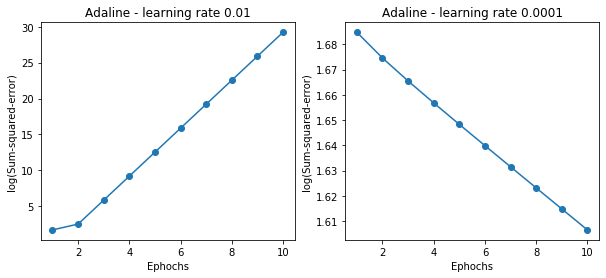

In [38]:
#ADALINEの結果プロット 学習率eta=0.01　と0.0001の時
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Ephochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_)+1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Ephochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - learning rate 0.0001')

plt.show()

In [39]:
#標準化　eta=0.01のモデルに適用
X_std = np.copy(X)
X_std[: , 0] = (X[: , 0] - X[: , 0].mean()) / X[: , 0].std()
X_std[: , 1] = (X[: , 1] - X[: , 1].mean()) / X[: , 1].std()

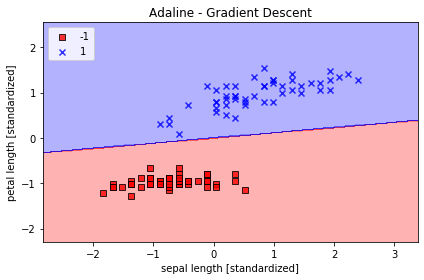

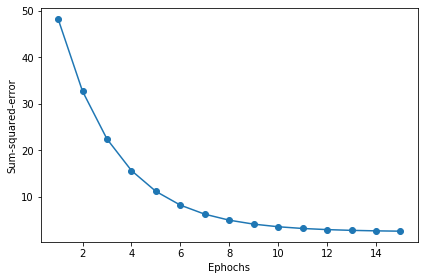

In [40]:
#勾配降下法によるADALINEの学習  標準化後：学習率eta=0.01
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Ephochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

In [49]:
#ADALINE 確率的勾配降下法
from numpy.random import seed

class AdalineSGD(object) :
    '''
    ADALINE分類器
    
    パラメータ
    ----------------
    eta : float
        学習率(0.0より大きく1.0以下の値)
    n_iter : int
        トレーニングデータのトレーニング回数
    shuffle : bool (default TRUE)
        Trueの時、循環を回避するためエポックごとにトレーニングデータをシャッフル
    random_state : int
        重みを初期化するための乱数シード
        
    属性
    ----------------
    w_ : 1次元配列
        適合後の重み
    cost_ : リスト
        各エポックですべてのトレーニングサンプルの平均を求める誤差平方和コスト関数
    '''
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None) :
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y) :
        '''
        トレーニングデータに適合させる
        
        パラメータ
        ----------------
        X : { 配列のようなデータ構造}, shape = {n_samples, n_features}
            トレーニングデータ
            n_sample: サンプルの個数  n_feature: 特徴量の個数
        y : 配列のようなデータ構造, shape = {n_samples}
            目的変数
            
        戻り値
        ----------------
        self : object
        '''
        
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter) :
            if self.shuffle:
                X, y = self._shuffle(X, y)
            
            cost = []
            
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    
    def partial_fit(self, X, y) :
        #重みを再初期化することなくトレーニングデータへ適合させる
        
        #初期化されていない場合は初期化
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
            
        #目的変数yの要素数が2以上の時、各サンプルの特徴量と目的変数で重みを更新
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y) :
                self._update_weights(xi, target)
        
        #目的変数ｙの要素数が1の時はサンプル全体の特徴量と目的変数で重みを更新
        else:
            self._update_weights(X, y)
        return self
    
    
    def _shuffle(self, X, y) :
        #トレーニングデータシャッフル
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m) :
        #重みを小さな乱数へ初期化
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target) :
        #ADALINEの学習規則を用いて重みを更新
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error ** 2
        return cost
    
    
    def net_input(self, X) :
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X) :
        return X
    
    def predict(self, X) :
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
        

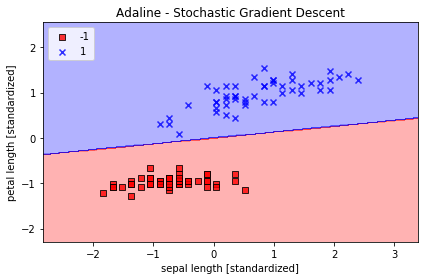

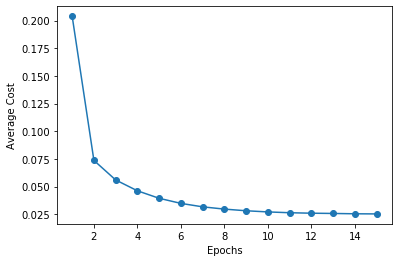

In [50]:
#確率的勾配降下法によるADALINEの学習
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()